## In this section, we add libraries used in machine learning to the program

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import joblib

## ## Reading the data in


In [2]:
data = pd.read_csv('FuelConsumption.csv')

In [3]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Let's select some features that we want to use for regression.


In [71]:
cdf = data[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
predict = 'CO2EMISSIONS'
# 
X = np.array(cdf.drop([predict], axis=1))
y = np.array(cdf[predict])

### Let's plot Emission values with respect to Engine size:


Text(0, 0.5, 'CO2EMISSIONS')

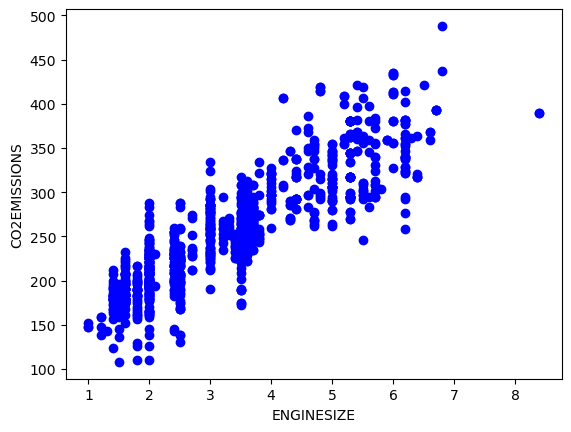

In [66]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')

### We use this function here to select the best grade

In [72]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=4)
def best_degree():
    degree = [1,2,3,4,5]
    best_deg = 1
    best_score = -np.inf
    for dg in degree:
        feature_poly = PolynomialFeatures(degree=dg)
        train_x_poly = feature_poly.fit_transform(train_x)
        test_x_poly = feature_poly.transform(test_x)
        model = LinearRegression()
        model.fit(train_x_poly,train_y)
        predicted = model.predict(test_x_poly)
        score = r2_score(test_y, predicted)
        if score > best_score:
            best_score = score
            best_deg = dg

    return best_deg

dg = best_degree()
print(dg)

5


### Now we start training the machine

In [73]:
dg = best_degree()
poly_feature = PolynomialFeatures(degree=dg)
train_x_poly = poly_feature.fit_transform(train_x)
test_x_poly = poly_feature.transform(test_x)


In [74]:
model = LinearRegression()
model.fit(train_x_poly,train_y)
predicted = model.predict(test_x_poly)
acc = r2_score(test_y, predicted)
print(acc)

0.9840583742073747


### Here you can see how close our machine predicts the data to the real value

In [62]:
for i in range(len(predicted)):
    print (f"Real: {test_y[i]}  Predicted: {predicted[i]}")
    print ("**********************************************")

Real: 262  Predicted: 266.38985688844696
**********************************************
Real: 237  Predicted: 226.51510556844732
**********************************************
Real: 258  Predicted: 260.31101299240254
**********************************************
Real: 271  Predicted: 270.660501313454
**********************************************
Real: 292  Predicted: 289.5278191642137
**********************************************
Real: 260  Predicted: 262.30479542101966
**********************************************
Real: 124  Predicted: 113.93513479722697
**********************************************
Real: 177  Predicted: 177.22687446536565
**********************************************
Real: 334  Predicted: 330.24809643102344
**********************************************
Real: 285  Predicted: 285.3664353879867
**********************************************
Real: 228  Predicted: 227.19970213128545
**********************************************
Real: 260  Predicted: 266.5481922414